In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Preprocess Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and reshape
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encoding
y_test = to_categorical(y_test, 10)

# Build CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and Train
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate on Test Set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy for CNN: {test_accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8315 - loss: 0.5397 - val_accuracy: 0.9811 - val_loss: 0.0661
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9714 - loss: 0.1007 - val_accuracy: 0.9870 - val_loss: 0.0444
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9797 - loss: 0.0671 - val_accuracy: 0.9866 - val_loss: 0.0436
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9893 - val_loss: 0.0370
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9898 - val_loss: 0.0344
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9885 - loss: 0.0325
Test Accuracy for CNN: 0.9911


KNN Accuracy with PCA: 0.9752
SVM Accuracy with PCA: 0.7601


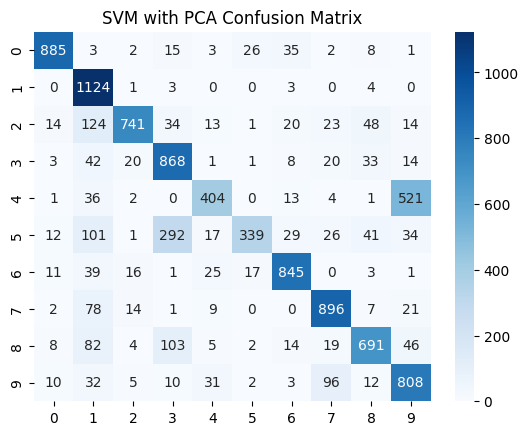

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten and Normalize Data
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train.argmax(axis=1))
y_pred_knn_pca = knn_pca.predict(X_test_pca)
knn_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_knn_pca)
print(f"KNN Accuracy with PCA: {knn_accuracy:.4f}")

# SVM with PCA
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train.argmax(axis=1))
y_pred_svm_pca = svm_pca.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_svm_pca)
print(f"SVM Accuracy with PCA: {svm_accuracy:.4f}")

# Confusion Matrix for SVM
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_svm_pca)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("SVM with PCA Confusion Matrix")
plt.show()
